In [1]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import os

#Read in all images
img = []
filenames = []
for filename in os.listdir('./img'):
    filenames.append(filename)
    image = cv2.cvtColor(cv2.imread(os.path.join('./img',filename)), cv2.COLOR_BGR2RGB)
    if image is not None:
        img.append(image)

#print(img[0])
#img[0].shape
#plt.imshow(img[0])




Once all of the images are read in, they will need to be converted to grayscale.

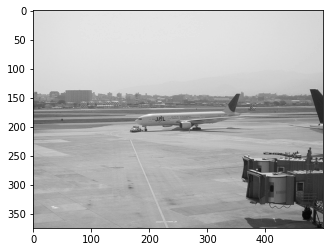

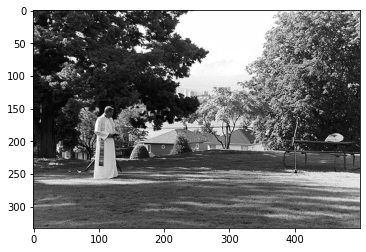

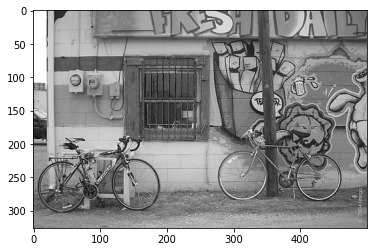

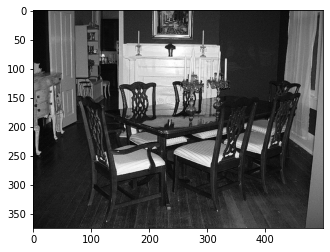

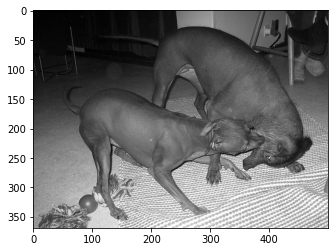

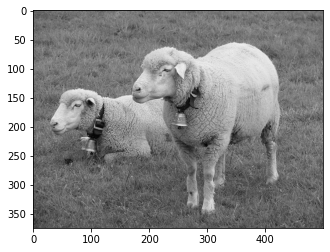

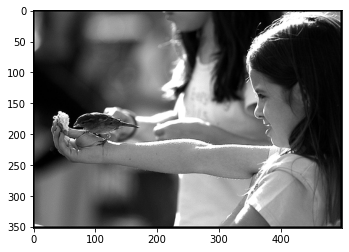

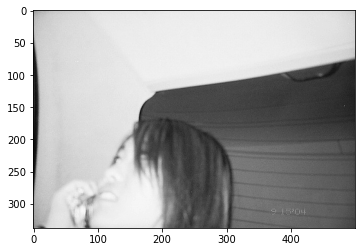

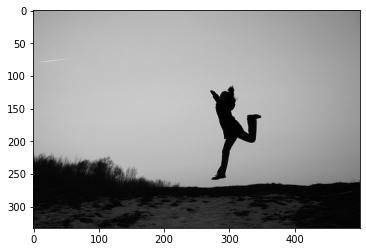

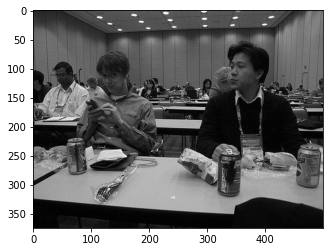

In [2]:
#Convert all images to grayscale
gray = img.copy()
for n in range(len(img)):
    gray[n] = rgb2gray(gray[n])
    plt.show()
    plt.imshow(gray[n], cmap='gray')



After converting to grayscale, the thresholds will be applied to each image. In essence, Otsu's threshold is calculated for each image and then applied to each pixel to generate the output value. For this implementation, we use 4 different thresholds to generate a clearer output image.

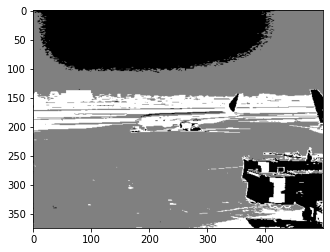

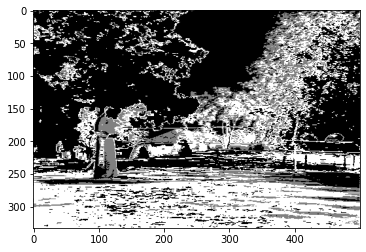

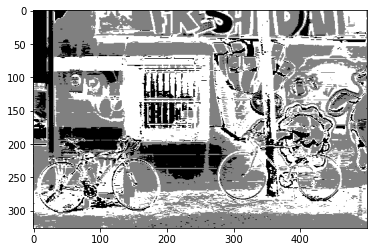

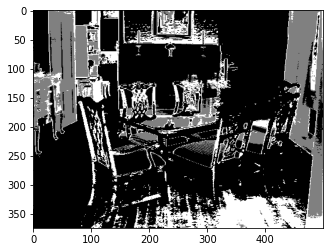

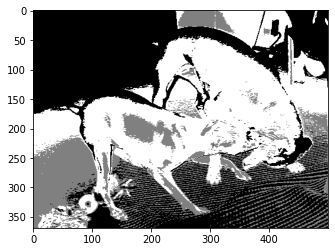

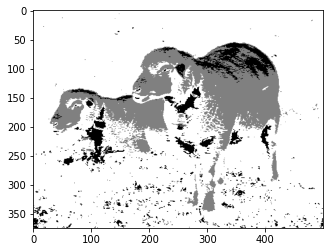

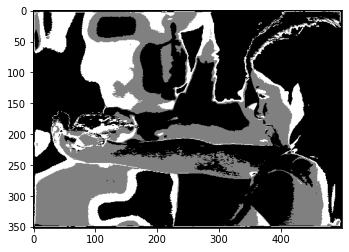

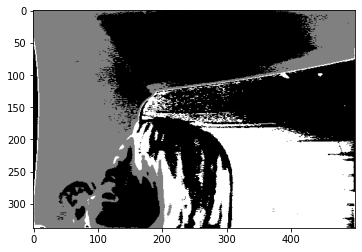

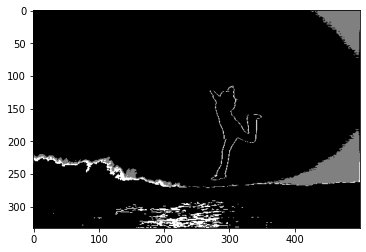

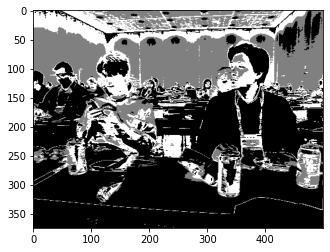

In [3]:
gray_r = gray.copy()
for n in range(len(gray)):
    gray_r[n] = gray[n].reshape(gray[n].shape[0]*gray[n].shape[1])
    gray_r[n] = cv2.GaussianBlur(gray_r[n], (21,21),1)  #Apply blur to reduce noise
    thresh = threshold_otsu(gray_r[n])  #Calculate otsu threshold based on image
    for i in range(gray_r[n].shape[0]): #Change pixel value based on threshold
        if gray_r[n][i] > thresh + thresh/2:
            gray_r[n][i] = 1
        elif gray_r[n][i] > thresh:
           gray_r[n][i] = 0.75
        elif gray_r[n][i] > thresh/2:
            gray_r[n][i] = 0.5
        else:
           gray_r[n][i] = 1
    gray[n] = gray_r[n].reshape(gray[n].shape[0],gray[n].shape[1])
    gray[n] = 1 - gray[n] #invert for better visibility
    cv2.imwrite("./output/output_{:01d}.jpg".format(n + 1),gray[n] * 255)
    plt.show()
    plt.imshow(gray[n], cmap='gray')


The next section is to view the input and output images side-by-side

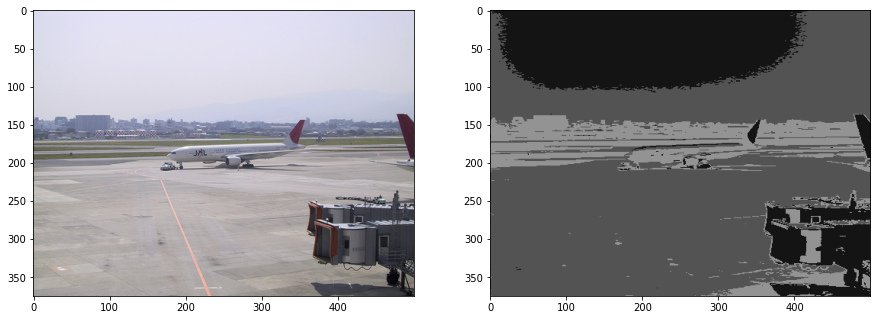

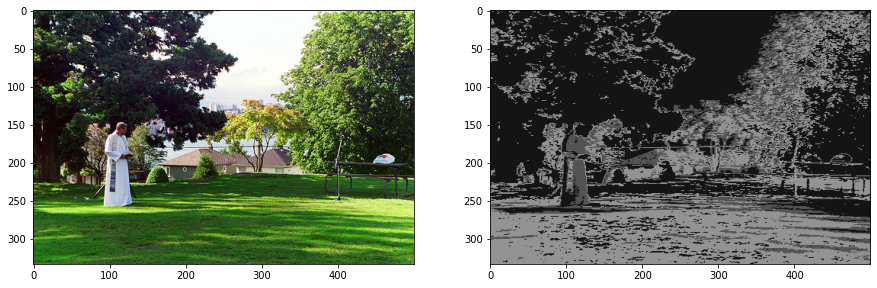

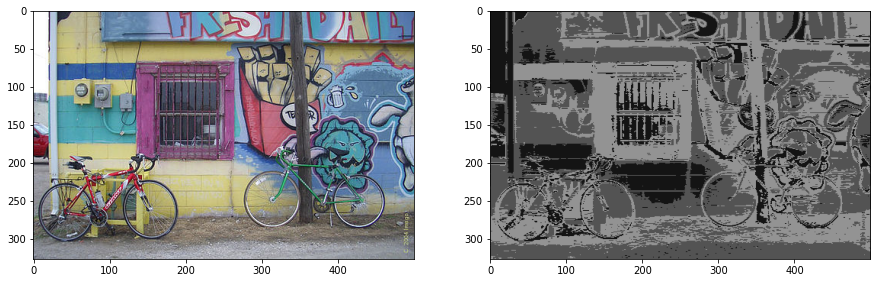

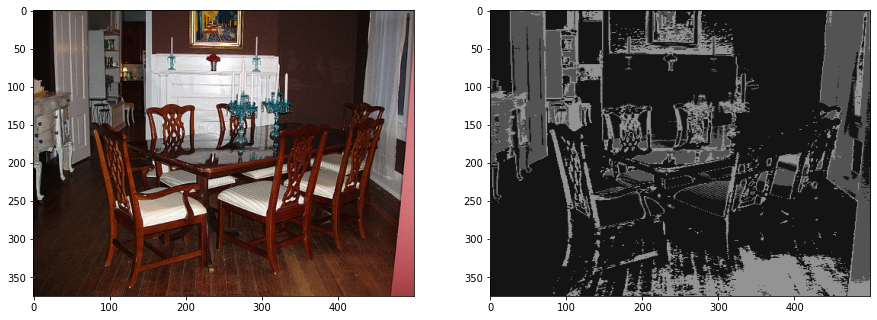

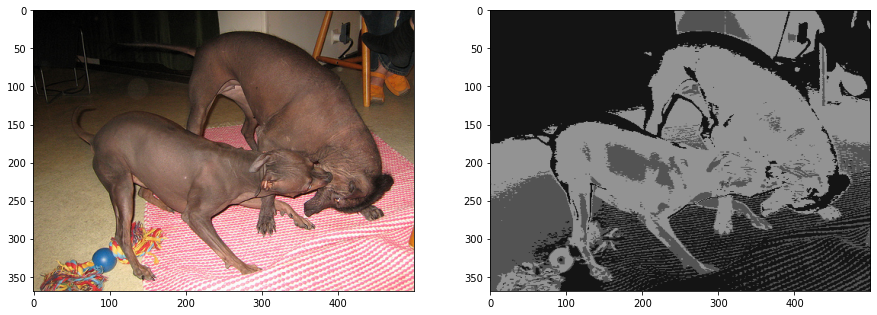

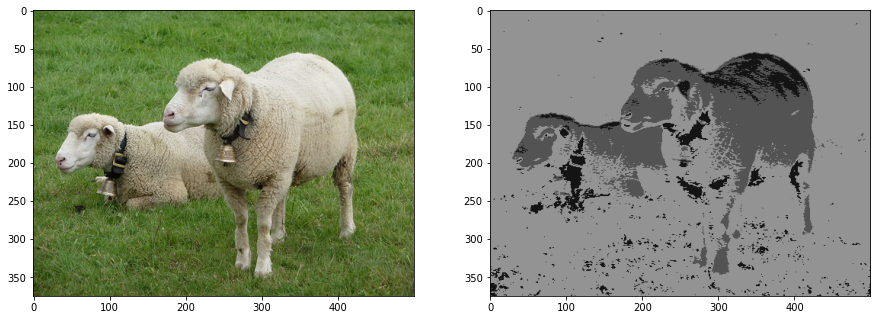

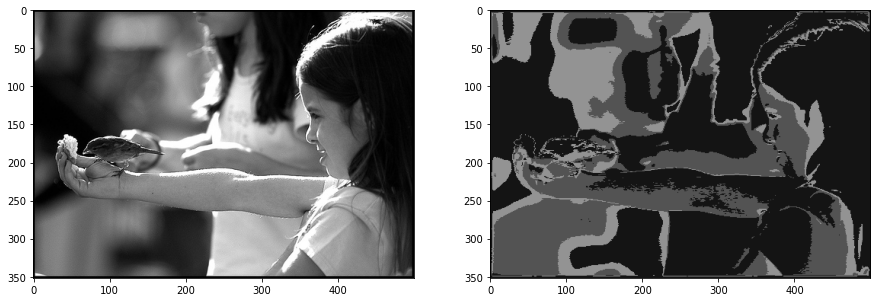

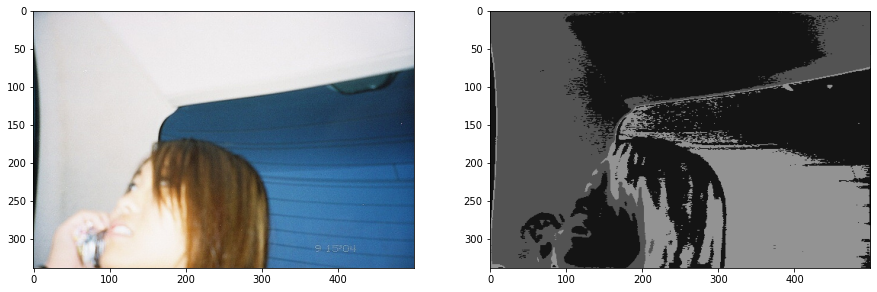

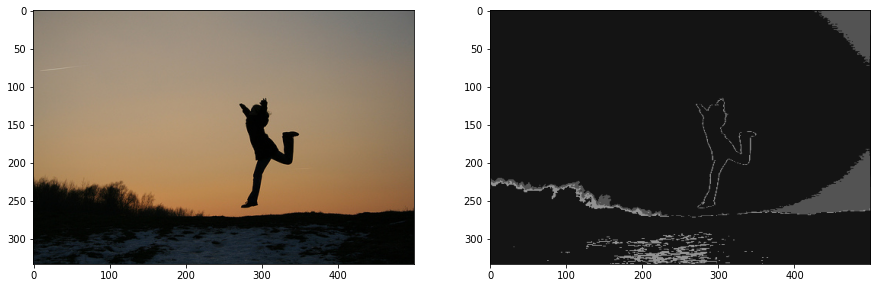

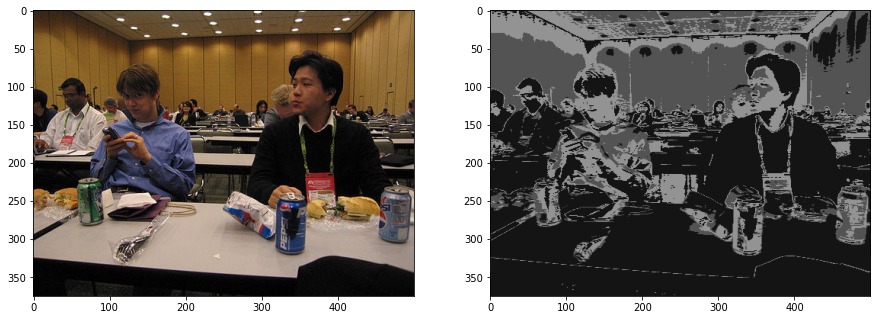

In [4]:
#Display output
for n in range(10):
    output = np.array(img[n].copy())
    output[:,:,0] = gray[n] * 255
    output[:,:,1] = gray[n] * 255
    output[:,:,2] = gray[n] * 255

    plt.figure(figsize=(15, 15))
    plt.subplot(1,2,1)
    plt.imshow(img[n])
    plt.subplot(1,2,2)
    plt.imshow(output + 20)

    plt.show()

We can now calculate the RMSE and PSNR for each image so that they can be compared with the other segmentation methods.

In [103]:
#Calculate metrics
def rmse(r,t):
    #r is the original image, t is the segmented image
    return np.sqrt((np.sum(r ** 2) / np.sum((r - t) ** 2)) / (t.shape[0] * t.shape[1] * 3))

def psnr(r,t):
    #r is the original image, t is the segmented image
    return 10 * math.log10((r.max())**2/(np.sqrt((np.sum(r**2)/np.sum((r-t)**2))/(t.shape[0]*t.shape[1]*3))))

In [104]:
print(" # |    filename     |    rmse    |  psnr")
print("===+=================+============+=========")
for n in range(10):
    print("%2s"%(n+1),"|", filenames[n], "| %.8f"%rmse(img[n],output[n]), "| %.4f"%psnr(img[n],output[n]))

 # |    filename     |    rmse    |  psnr
===+=================+============+=========
 1 | 2008_000337.jpg | 0.01529820 | 66.2844
 2 | 2008_002253.jpg | 0.01479543 | 66.4295
 3 | 2008_006749.jpg | 0.01505847 | 66.3530
 4 | 2008_008775.jpg | 0.01476321 | 66.4390
 5 | 2009_000098.jpg | 0.01471963 | 66.4518
 6 | 2009_002483.jpg | 0.01500107 | 66.3696
 7 | 2011_000547.jpg | 0.01430099 | 66.5771
 8 | 2011_004995.jpg | 0.01487078 | 66.4075
 9 | 2011_005511.jpg | 0.01408059 | 65.3227
10 | 2012_003161.jpg | 0.01454204 | 66.5046
